## IMPORT LIBARIES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,precision_score
import re
import string
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from wordcloud import WordCloud


In [ ]:
pip install wordcloud

In [ ]:
data=pd.read_csv(r"/content/spam_ham_dataset.csv",encoding="latin=1")

In [ ]:
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
data.shape

(5171, 4)

In [ ]:
data.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [ ]:
data.isna().sum()

,0
Unnamed: 0,0
label,0
text,0
label_num,0


In [ ]:
data.drop(["Unnamed: 0","label"],axis=1,inplace=True)

In [ ]:
data.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
data.columns

Index(['text', 'label_num'], dtype='object')

In [ ]:
data.shape

(5171, 2)

In [ ]:
data.describe()

,label_num
count,5171.000000
mean,0.289886
std,0.453753
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       5171 non-null   object
 1   label_num  5171 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 80.9+ KB


In [ ]:
data.isna().sum()

,0
text,0
label_num,0


## PREPROCESSING THE TEXT DATA

### creating function to process text

In [ ]:

def wordopt(text):
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub("\\W"," ",text)
    text=re.sub('https?://\S+|www\.\S+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text=re.sub('\n','',text)
    text=re.sub('\w*\d\w*','',text)
    return text

In [ ]:
data["text"]=data["text"].apply(wordopt)

## LEMMATIZATION

In [20]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [21]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [22]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))


In [23]:
def preprocess_text(text):
    tokens = word_tokenize(str(text))
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(tokens)


In [25]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [26]:
data['text'] = data['text'].apply(preprocess_text)

## DATA VISTUALIZATION:

### COUNT OF SPAM VS HAM MESSAGES

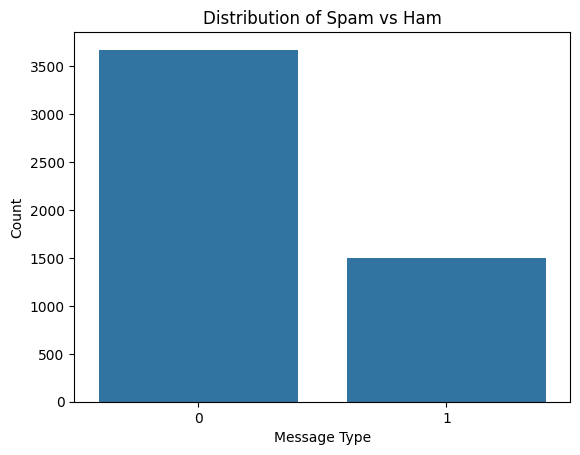

In [29]:
sns.countplot(data=data, x='label_num')
plt.title('Distribution of Spam vs Ham')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.show()

### MESSAGE LENGTH DISTRIBUTIION

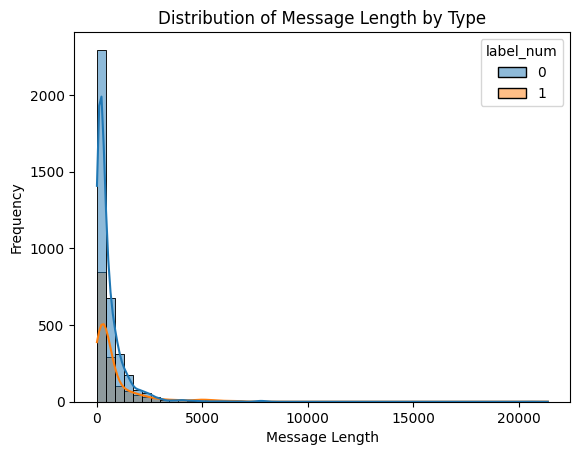

In [31]:
data['text_length'] = data['text'].apply(len)

sns.histplot(data=data, x='text_length', hue='label_num', bins=50, kde=True)
plt.title('Distribution of Message Length by Type')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

### WORD CLOUD FOR SPAM VS HAM

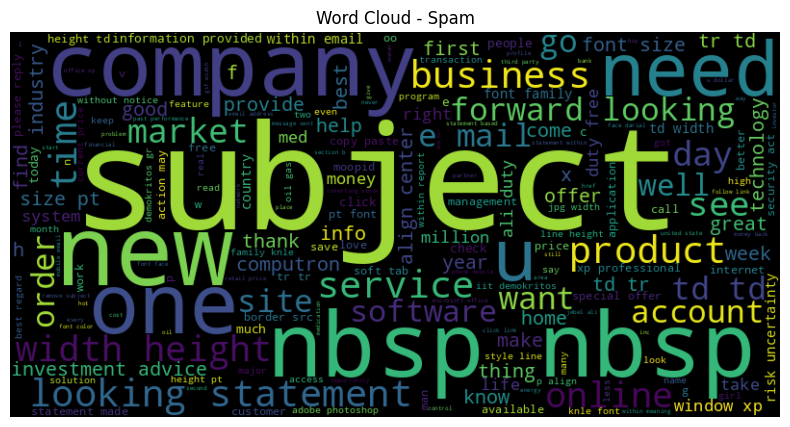

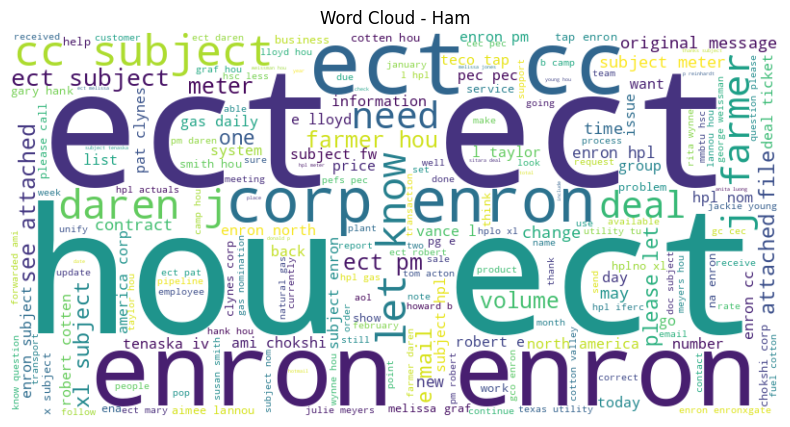

In [33]:
# Word cloud for spam
spam_words = ' '.join(data[data['label_num'] == 1]['text'])
spam_wc = WordCloud(width=800, height=400, background_color='black').generate(spam_words)

plt.figure(figsize=(10, 5))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Spam')
plt.show()

# Word cloud for ham
ham_words = ' '.join(data[data['label_num'] == 0]['text'])
ham_wc = WordCloud(width=800, height=400, background_color='white').generate(ham_words)

plt.figure(figsize=(10, 5))
plt.imshow(ham_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Ham')
plt.show()

### AVERAGE MESSAGE LENGTH BY LABEL

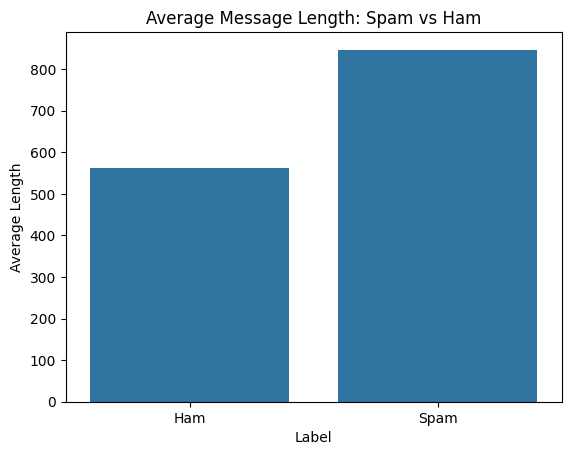

In [35]:
avg_lengths = data.groupby('label_num')['text_length'].mean().reset_index()

sns.barplot(data=avg_lengths, x='label_num', y='text_length')
plt.title('Average Message Length: Spam vs Ham')
plt.xlabel('Label')
plt.ylabel('Average Length')
plt.xticks(ticks=[0, 1], labels=['Ham', 'Spam'])
plt.show()

## DATA SPLITING

In [36]:
x=data["text"]
y=data["label_num"]

In [37]:
x

,text
0,subject enron methanol meter follow note gave ...
1,subject hpl nom january see attached file hpln...
2,subject neon retreat ho ho ho around wonderful...
3,subject photoshop window office cheap main tre...
4,subject indian spring deal book teco pvr reven...
...,...
5166,subject put ft transport volume decreased cont...
5167,subject following noms hpl take extra mmcf wee...
5168,subject calpine daily gas nomination julie men...
5169,subject industrial worksheet august activity a...


In [38]:
y

,label_num
0,0
1,0
2,0
3,1
4,0
...,...
5166,0
5167,0
5168,0
5169,0


In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [40]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(3878,) (1293,) (3878,) (1293,)


## NLP

In [41]:
vectorization=TfidfVectorizer()
xv_train=vectorization.fit_transform(x_train)
xv_test=vectorization.transform(x_test)

In [42]:
xv_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 236439 stored elements and shape (3878, 36796)>

In [43]:
xv_train.shape

(3878, 36796)

## MODEL BUILDING

### Logistic Regression

In [44]:
LR=LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [45]:
pred_lr1=LR.predict(xv_test)
pred_lr1

array([0, 1, 0, ..., 0, 0, 0])

In [46]:
LR_acc=LR.score(xv_test,y_test)
LR_acc

0.9860788863109049

In [47]:
print(classification_report(y_test,pred_lr1))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       930
           1       0.96      0.99      0.98       363

    accuracy                           0.99      1293
   macro avg       0.98      0.99      0.98      1293
weighted avg       0.99      0.99      0.99      1293



### Decision Tree Classifier

In [48]:
DT=DecisionTreeClassifier()
DT.fit(xv_train,y_train)

DecisionTreeClassifier()

In [49]:
pred_dt1=DT.predict(xv_test)
pred_dt1

array([0, 1, 0, ..., 0, 0, 0])

In [50]:
pred_dt2=DT.predict(xv_train)
pred_dt2

array([1, 0, 0, ..., 1, 0, 0])

In [51]:
DT_acc=accuracy_score(y_test,pred_dt1)
DT_acc

0.9296210363495746

In [52]:
precision_score(y_test,pred_dt1)

0.8777777777777778

### Gradient Boosting Classifier

In [53]:
GB=GradientBoostingClassifier()
GB.fit(xv_train,y_train)

GradientBoostingClassifier()

In [54]:
pred_gb=GB.predict(xv_test)
#pred_gb=GB.predict(xv_train)
pred_gb

array([0, 1, 0, ..., 0, 0, 0])

In [55]:
y_test

,label_num
1566,0
1988,1
1235,0
2868,0
4903,0
...,...
5170,1
3825,1
3431,0
4513,0


In [56]:
GB_acc=accuracy_score(y_test,pred_gb)
GB_acc

0.9535962877030162

In [57]:
print(classification_report(y_test,pred_gb))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       930
           1       0.92      0.91      0.92       363

    accuracy                           0.95      1293
   macro avg       0.94      0.94      0.94      1293
weighted avg       0.95      0.95      0.95      1293



### Random Forest Classifier

In [58]:
RF=RandomForestClassifier(random_state=0)
RF.fit(xv_train,y_train)

RandomForestClassifier(random_state=0)

In [59]:
pred_rf=RF.predict(xv_test)

In [60]:
RF_acc=RF.score(xv_test,y_test)
RF_acc

0.9775715390564579

In [61]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred_rf))

[[915  15]
 [ 14 349]]


## PERFORMANCE ANALYSIS ON EACH MODEL

In [62]:
pt=[]
t=[]
for i in[LR,GB,RF,DT]:
    i.fit(xv_train,y_train)
    pt.append(round(accuracy_score(y_test,i.predict(xv_test))*100,2))
    t.append(round(accuracy_score(y_train,i.predict(xv_train))*100,2))
print(pt)
print(t)

[98.61, 95.44, 97.76, 92.73]
[99.54, 97.29, 100.0, 100.0]
